---
title: "Handwritten Digit Recognition"
description: "Handwritten digit classification with neural networks involves training a model to recognize digits from images. Using layers of interconnected nodes, the network learns to map pixel values to digit classes through training. This application is crucial for tasks like optical character recognition and digitizing handwritten documents."
author: "Vraj Shah"
date: "9/8/2023"
---

### Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Dataset

In [6]:
X = np.load("data/X.npy")
y = np.load("data/y.npy")

In [7]:
print('The shape of X is:', (X.shape))
print('The shape of y is:', (y.shape))

print('The shape of X[0] is:', (X[0].shape))
print('Value of y[0] is:', y[0])

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)
The shape of X[0] is: (400,)
Value of y[0] is: [0]


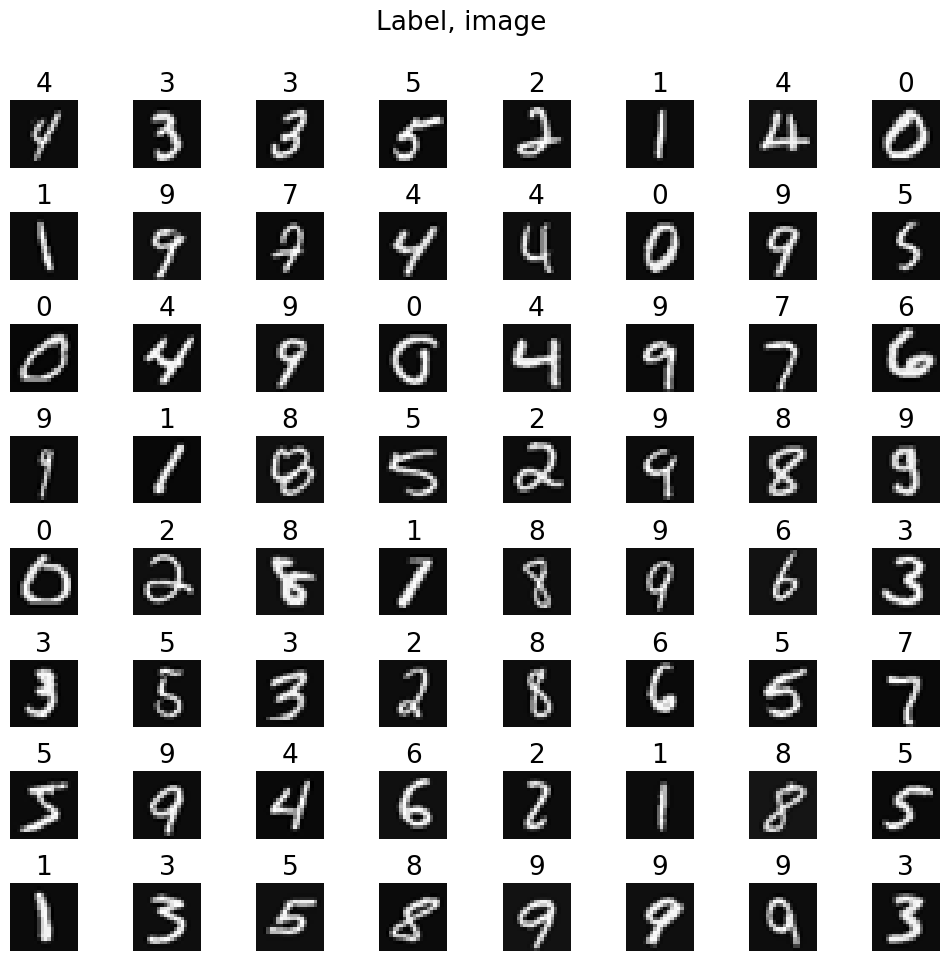

In [8]:
m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.tight_layout(rect=[0, 0.0, 1, 0.91])

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(y[random_index, 0], fontsize=19)
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=19)

### Model

In [9]:
tf.random.set_seed(1234)

model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(units=25, activation='relu', name='L1'),
        Dense(units=15, activation='relu', name='L2'),
        Dense(units=10, activation='linear', name='L3'),

    ], name="my_model"
)

In [10]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
[layer1, layer2, layer3] = model.layers

W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [12]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X, y,
    epochs=40
)

Epoch 1/40

157/157 [==============================] - 1s 2ms/step - loss: 1.8278
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.7689
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.4704
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3696
Epoch 5/40
157/157 [==============================] - 0s 3ms/step - loss: 0.3148
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2759
Epoch 7/40
157/157 [==============================] - 0s 3ms/step - loss: 0.2503
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2280
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2137
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1947
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1841
Epoch 12/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1706
Epoch 13/40
157/157 [===

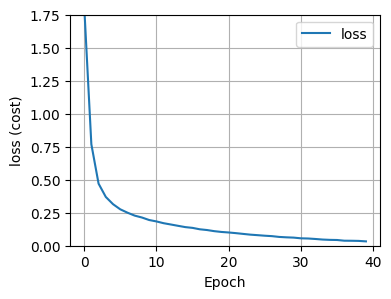

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(history.history['loss'], label='loss')
ax.set_ylim([0, 1.75])
ax.set_xlabel('Epoch')
ax.set_ylabel('loss (cost)')
ax.legend()
ax.grid(True)
plt.show()

### Prediction

C:\Users\vrajs\AppData\Local\Temp\ipykernel_18392\2281255842.py:3: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(rect=[0, 0.0, 1, 0.91])


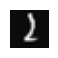

In [14]:
X[1015]                 # This is an image of 2
fig, ax = plt.subplots(1, 1, figsize=(0.5, 0.5))
fig.tight_layout(rect=[0, 0.0, 1, 0.91])
X_reshaped = X[1015].reshape((20, 20)).T
ax.set_axis_off()
ax.imshow(X_reshaped, cmap='gray')
plt.show()

In [15]:
prediction = model.predict(X[1015].reshape(1, 400))          # prediction

print(f"Prediction: \n{prediction}")
print(f"Index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 94ms/step
Prediction: 
[[-8.457523   1.3707368  4.68359   -2.3333073 -9.920081  -7.871964
  -7.7648544  0.6922297 -5.3786387 -5.3329587]]
Index: 2


In [16]:
prediction = model.predict(X)
yhat = np.argmax(prediction, axis=1)
doo = yhat != y[:, 0]
idxs = np.where(yhat != y[:, 0])[0]
print( f"{len(idxs)} errors out of {len(X)} images")
    

157/157 [==============================] - 0s 2ms/step
19 errors out of 5000 images
